In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import *
from datetime import date
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression as LinReg
%matplotlib inline
plt.style.use('seaborn');

In [2]:
dtset = pd.read_csv("../data/temperatureireland.csv", sep=',', 
                    encoding = "ISO-8859-1", low_memory= False, error_bad_lines=False)

In [7]:
dtsetwint = pd.read_csv("../data/dly532.csv", sep=',', 
                    encoding = "ISO-8859-1", low_memory= False, error_bad_lines=False)

In [3]:
dtset

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-jan-1987 00:00,0,0.1,0,6.8,0,6.4,5.9,9.3,94,...,2,5,2,130,61,62,0.0,6000,40,8
1,01-jan-1987 01:00,0,1.0,0,6.5,0,5.9,5.2,8.8,91,...,2,9,2,150,61,66,0.0,8000,35,8
2,01-jan-1987 02:00,0,0.4,0,6.3,0,5.9,5.4,9.0,94,...,2,11,2,130,61,66,0.0,12000,35,8
3,01-jan-1987 03:00,2,0.0,0,6.7,0,6.2,5.6,9.1,93,...,2,14,2,120,61,66,0.0,12000,35,8
4,01-jan-1987 04:00,0,0.2,0,7.0,0,6.5,5.9,9.3,93,...,2,16,2,120,58,66,0.0,12000,16,8
5,01-jan-1987 05:00,0,0.3,0,6.5,0,6.3,6.1,9.4,97,...,2,15,2,120,58,66,0.0,8000,12,8
6,01-jan-1987 06:00,0,0.7,0,6.6,0,6.4,6.2,9.4,97,...,2,12,2,110,58,65,0.0,3000,5,8
7,01-jan-1987 07:00,0,0.5,0,6.5,0,6.4,6.3,9.5,98,...,2,11,2,120,59,65,0.0,3000,2,8
8,01-jan-1987 08:00,0,0.9,0,7.1,0,7.0,6.9,9.9,99,...,2,9,2,130,59,65,0.0,3000,2,8
9,01-jan-1987 09:00,0,0.3,0,7.2,0,7.0,6.8,9.9,97,...,2,7,2,140,60,65,0.0,3000,5,8


In [4]:
dtset['date'] = pd.to_datetime(dtset['date'])

In [5]:
dtset['year'] = dtset['date'].apply(lambda x: x.year)
dtset['month'] = dtset['date'].apply(lambda x: x.month)
dtset['day'] = dtset['date'].apply(lambda x: x.day)
dtset['dayofweek'] = dtset['date'].apply(lambda x: x.dayofweek)

In [6]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [7]:
dtset['dayofweek'] = dtset['dayofweek'].map(dmap)

In [8]:
times = pd.DatetimeIndex(dtset['date'])

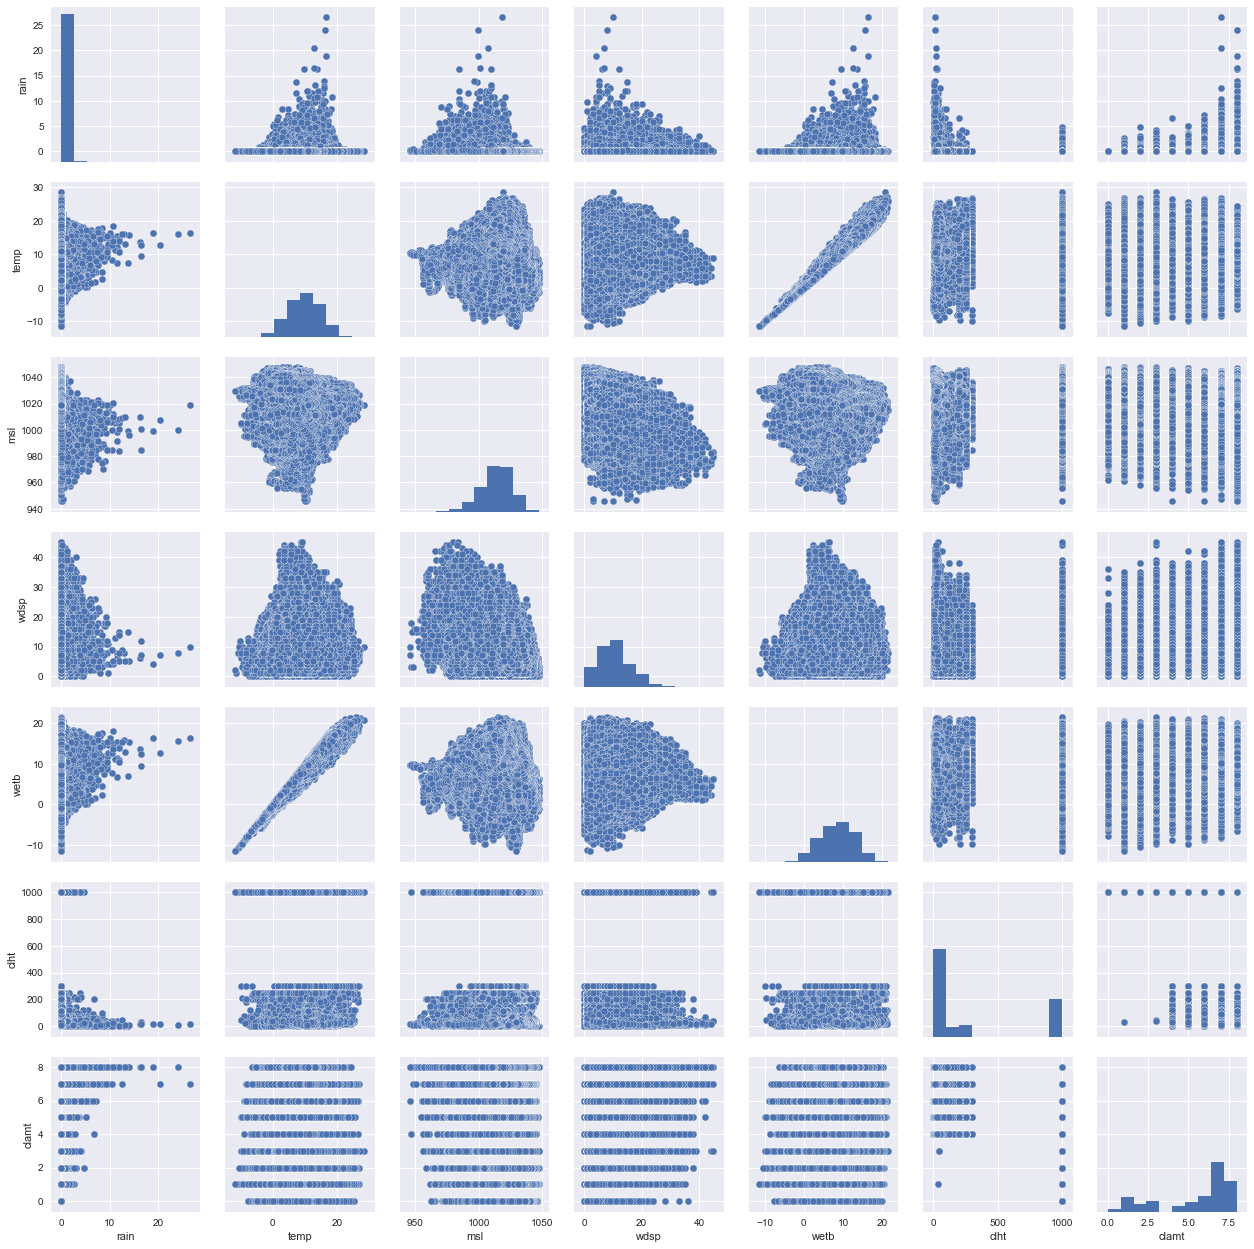

In [9]:
sns.pairplot(dtsetnew)

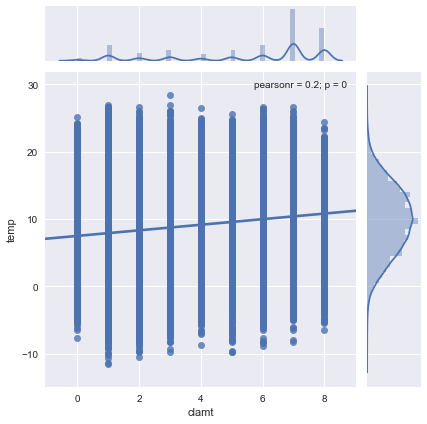

In [10]:
sns.jointplot(x='clamt', y='temp', data=dtset, kind='reg')

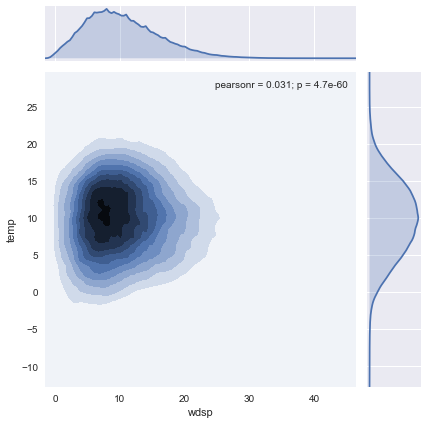

In [11]:
sns.jointplot(x='wdsp', y='temp', data=dtset, kind='kde')

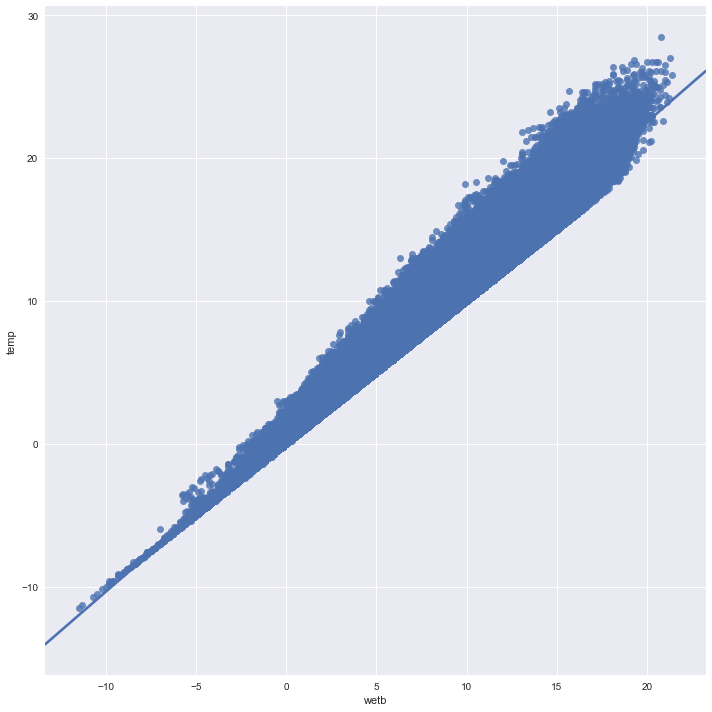

In [12]:
sns.lmplot(x ='wetb' , y='temp', data=dtset,size=10, palette='muted')

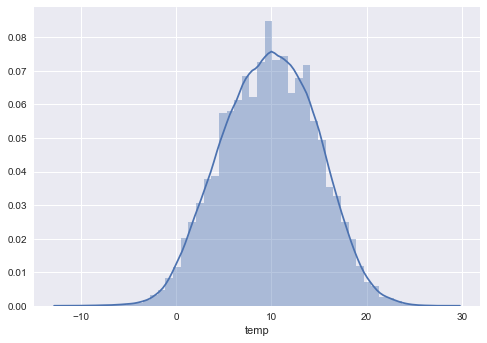

In [13]:
sns.distplot(dtset['temp'])

In [14]:
#sns.swarmplot(x=dtset.wdsp, y='temp', data=dtset)

In [15]:
dtTemp = dtset[['date', 'temp',]]

In [16]:
#dtTemp.set_index('date', inplace=True)

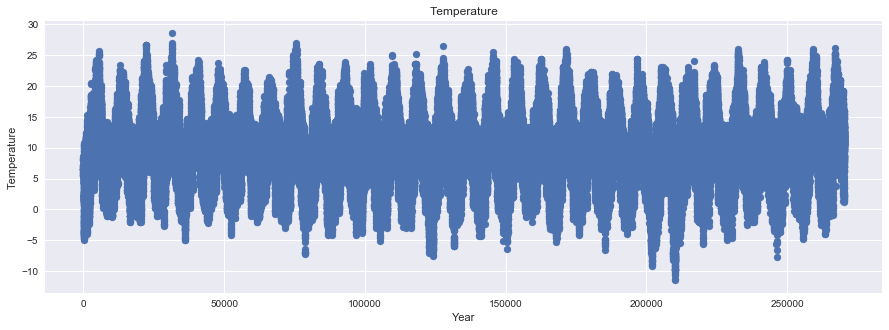

In [17]:
plt.figure(figsize=(15,5))
plt.scatter(x = dtTemp['temp'].index, y = dtTemp['temp'])
plt.title("Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

In [15]:
times = pd.DatetimeIndex(dtTemp['date'])

NameError: name 'dtTemp' is not defined

In [19]:
dtTempWinter = dtTemp[(times.month == 11) | (times.month == 12) | (times.month == 1) | (times.month == 2)  ]
timeTempWinter = pd.DatetimeIndex(dtTempWinter['date'])

In [20]:
grouped = dtTemp.groupby([times.year]).mean()
groupedTime = dtTemp.groupby([times.time]).mean()
groupWinYear = dtTempWinter.groupby([timeTempWinter.year]).mean()

In [21]:
grouped.head()

,temp
date,
1987,9.530320
1988,9.922256
1989,10.639053
1990,10.467808
1991,9.891724


In [22]:
x = grouped.index.values.reshape(-1,1)
y = grouped['temp'].values
reg = LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
print("Accuracy: " + str(reg.score(x,y)))

Accuracy: 0.0094051304749


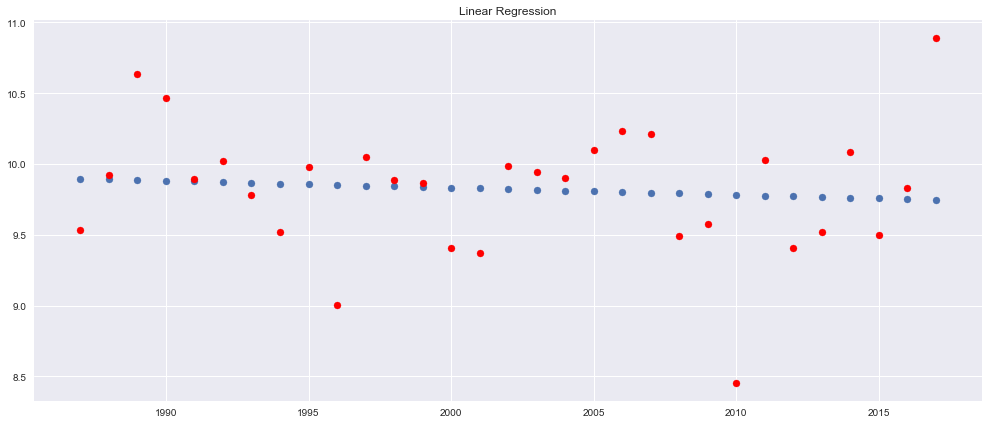

In [23]:
plt.figure(figsize=(17,7))
plt.title('Linear Regression')
plt.scatter (x = x, y = y_preds)
plt.scatter (x = x, y = y, c= "r")
plt.show();

The prediction is that winter this year will be stronger!
About the past, there is a year wich had a low average.
2010 was a stronger winter in Ireland.
<l1>
    https://en.wikipedia.org/wiki/Winter_of_2010%E2%80%9311_in_Great_Britain_and_Ireland
</l1>

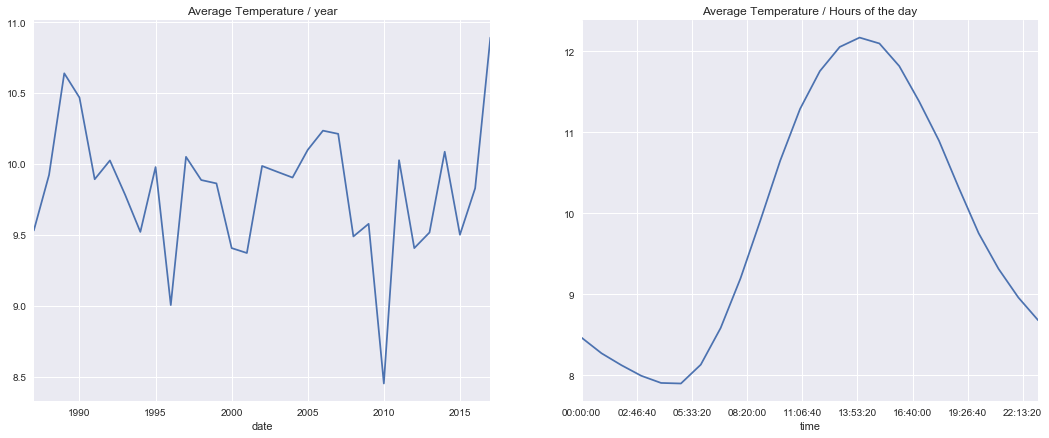

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18,7))
grouped['temp'].plot(ax = ax[0], title="Average Temperature / year")
groupedTime['temp'].plot(ax=ax[1], title="Average Temperature / Hours of the day")
plt.show();

The worsest winter in decades 2010

## Mean	Wind	Speed	(knot)

In [25]:
dtWind = dtset[['date', 'wdsp']]

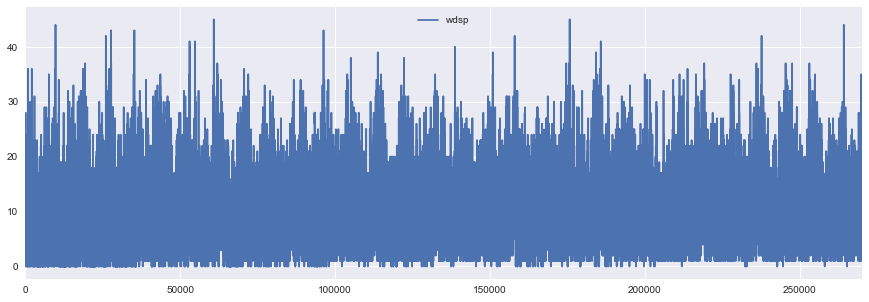

In [26]:
dtWind.plot(figsize=(15,5))

In [27]:
dtWind['km'] = dtWind.wdsp * 1.85

C:\Users\Felipe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
dtWind.head(5)

,date,wdsp,km
0,1987-01-01 00:00:00,5,9.25
1,1987-01-01 01:00:00,9,16.65
2,1987-01-01 02:00:00,11,20.35
3,1987-01-01 03:00:00,14,25.90
4,1987-01-01 04:00:00,16,29.60


In [29]:
timeW = pd.DatetimeIndex(dtWind['date'])

dtWindWinter = dtWind[(timeW.month == 11) | (timeW.month == 12) | (timeW.month == 1) | (timeW.month == 2)  ]

timeWinter = pd.DatetimeIndex(dtWindWinter['date'])

In [30]:
dtWindWinter.head(5)

,date,wdsp,km
0,1987-01-01 00:00:00,5,9.25
1,1987-01-01 01:00:00,9,16.65
2,1987-01-01 02:00:00,11,20.35
3,1987-01-01 03:00:00,14,25.90
4,1987-01-01 04:00:00,16,29.60


In [31]:
groupedW = dtWind.groupby(timeW.year).mean()

In [32]:
groupedWinter = dtWindWinter.groupby(timeWinter.year).mean()
groupedWinterMonth = dtWindWinter.groupby([timeWinter.year, timeWinter.month]).mean()

In [33]:
groupedWinter.head(5)

,wdsp,km
date,,
1987,9.912153,18.337483
1988,11.224518,20.765358
1989,10.805903,19.990920
1990,13.055903,24.153420
1991,11.392708,21.076510


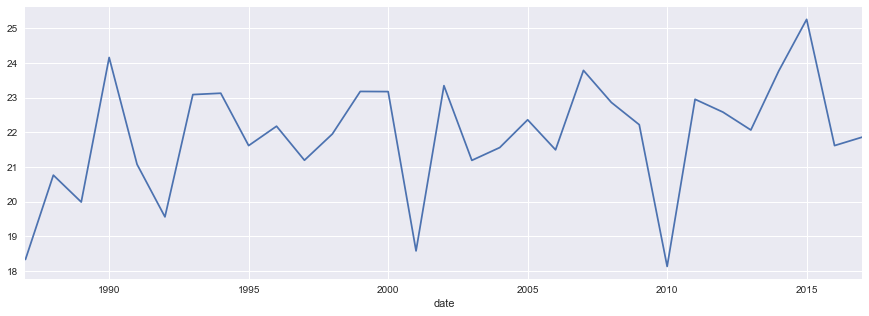

In [34]:
groupedWinter['km'].plot(figsize=(15,5))

In [35]:
groupedW.head(5)

,wdsp,km
date,,
1987,9.094635,16.825074
1988,9.924977,18.361208
1989,8.770434,16.225303
1990,10.394178,19.229229
1991,10.294863,19.045497


In [36]:
xw = groupedWinter.index.values.reshape(-1,1)
yw = groupedWinter['km'].values
reg = LinReg()
reg.fit(xw,yw)
yw_preds = reg.predict(xw)
print("Accuracy: " + str(reg.score(xw,yw)))

Accuracy: 0.099674734434


In [37]:
groupedWinter

,wdsp,km
date,,
1987,9.912153,18.337483
1988,11.224518,20.765358
1989,10.805903,19.990920
1990,13.055903,24.153420
1991,11.392708,21.076510
1992,10.575069,19.563877
1993,12.478472,23.085174
1994,12.499653,23.124358
1995,11.684375,21.616094


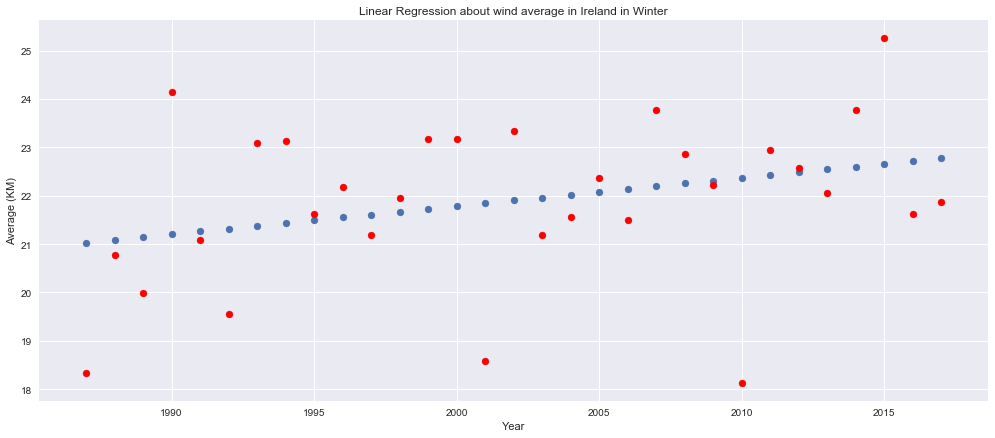

In [38]:
plt.figure(figsize=(17,7))
plt.title('Linear Regression about wind average in Ireland in Winter')
plt.scatter (x = xw, y = yw_preds)
plt.scatter (x = xw, y = yw, c= "r")
plt.ylabel('Average (KM)')
plt.xlabel('Year')
plt.show();

In [39]:
groupedWinterMonth.head(5)

wdsp         km
date date                      
1987 1      9.525538  17.622245
     2      8.889881  16.446280
     11     9.808333  18.145417
     12    11.322581  20.946774
1988 1     12.225806  22.617742

In [40]:
groupedWinterMonth['km']

date  date
1987  1       17.622245
      2       16.446280
      11      18.145417
      12      20.946774
1988  1       22.617742
      2       23.707112
      11      13.741389
      12      22.958401
1989  1       23.035484
      2       26.670833
      11      15.938264
      12      14.834812
1990  1       26.355040
      2       32.776935
      11      17.503056
      12      20.598656
1991  1       21.881720
      2       17.346503
      11      24.484236
      12      20.342540
1992  1       15.921438
      2       22.197342
      11      23.651736
      12      16.786761
1993  1       29.950605
      2       18.106324
      11      17.248681
      12      26.364987
1994  1       24.967540
      2       23.942634
                ...    
2010  2       15.620387
      11      20.930694
      12      15.521102
2011  1       18.069825
      2       21.451190
      11      21.876250
      12      30.221640
2012  1       26.862298
      2       20.458980
      11      20.265208
     

In [41]:
groupedWinterMonth.drop('wdsp', axis = 1, inplace=True)


In [42]:
#groupedWinterMonth = groupedWinterMonth.pivot_table(columns=timeWinter.month, index=timeWinter.year, values=groupedWinterMonth['km'])

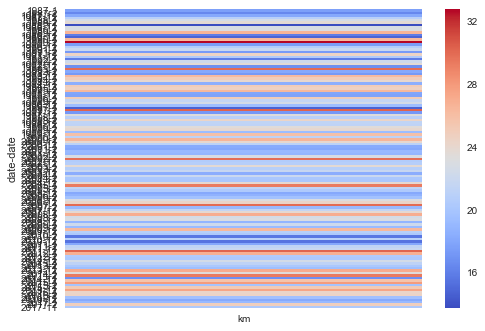

In [43]:
sns.heatmap(groupedWinterMonth, cmap='coolwarm')

# sunshine duration

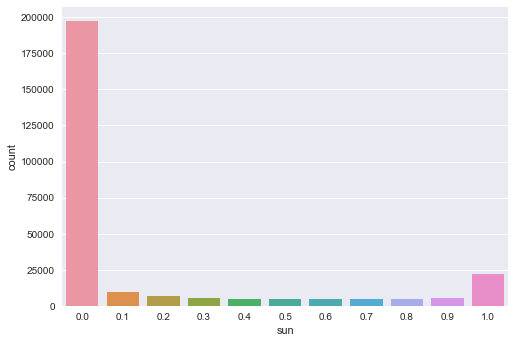

In [44]:
sns.countplot(dtset['sun']);

In [45]:
dtsun = dtset[['year', 'month', 'day', 'dayofweek','sun', 'temp']]

In [46]:
#timesSun = pd.DatetimeIndex(dtsun['date'])

In [47]:
dtsung = dtsun.groupby(['year','month','day'])['sun'].mean()

In [48]:
dtsung = pd.DataFrame(dtsung)

In [49]:
type(dtsung)

pandas.core.frame.DataFrame

In [50]:
dtsungyear = dtsung.pivot_table(columns='month', index=['year'], values='sun')
dtsungday = dtsung.pivot_table(columns='month', index=['day'], values='sun')

In [51]:
dtsung.columns

Index(['sun'], dtype='object')

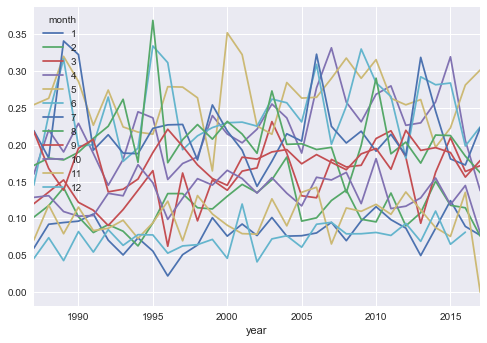

In [52]:
dtsungyear.plot()

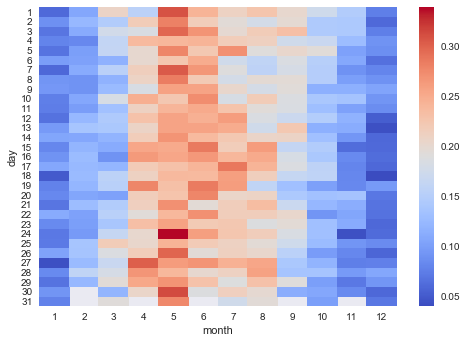

In [53]:
sns.heatmap(dtsungday, cmap='coolwarm' );

# Data about rainy days in Dublin

In [54]:
dtset.columns

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')

In [55]:
dtsetrain = dtset.groupby(['year', 'month'])['rain'].sum()

dtsetrain = pd.DataFrame(dtsetrain)

dtsetrain = dtsetrain.pivot_table(columns='month', index='year' ,values='rain')

dtsetrain.fillna(0, inplace=True)

In [56]:
dtsetrain.loc[2002][11]

185.79999999999976

In [57]:
dtsetrain.loc[2008][8]


189.89999999999986

In [58]:

dtsetrain.loc[2015][12]

193.49999999999989

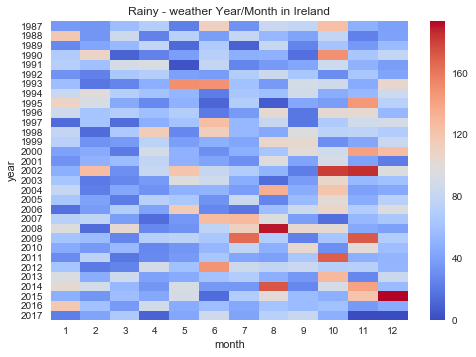

In [59]:
sns.heatmap(dtsetrain, cmap='coolwarm')
plt.title('Rainy - weather Year/Month in Ireland');

As you can see in the heatmap about ammount(mm) of rain in Ireland. There are some parts(red) that is more visible, those months were big weather events as you can see below.
<li>
    https://www.met.ie/climate-ireland/weather-events/Nov2002_rain.pdf (November 2002)
</li>
<li>
    http://www.met.ie/climate/MonthlyWeather/clim-2008-Aug.pdf (August 2008) 
</li>
<li>
    https://www.independent.ie/irish-news/storms/rainy-days-the-wettest-december-in-130-years-34339477.html (December 2015)
</li>


# 2010 x 2017

In [210]:
dtdaysnowing = dtset[((times.year ==2010) & (times.month == 12) & ((times.day == 23)|(times.day == 2) | (times.day == 6)) )]
dtsetWinterComp =dtset[((times.year == 2010) & (times.month == 12))] 
dtsetnow = dtset[((times.year == 2017) & (times.month == 10))]
dtsetbefore = dtset[((times.year == 2010) & (times.month == 10))]
dtset2016 = dtset[((times.year == 2016) & (times.month == 12))] 

In [211]:
dtsetWinterComp = dtsetWinterComp.drop(['date', 'ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4',
                                        'dayofweek'], axis=1)
dtdaysnowing = dtdaysnowing.drop(['date', 'ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4',
                                 'month', 'day', 'dayofweek'], axis=1)
dtsetnow = dtsetnow.drop(['date', 'ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4', 'dayofweek'], axis=1)
dtsetbefore = dtsetbefore.drop(['date', 'ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4',
                                'dayofweek'], axis=1)
dtset2016 = dtset2016.drop(['date', 'ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4',
                                        'dayofweek'], axis=1)


In [181]:
dtsetWinterComp.head(2)

,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,ww,w,sun,vis,clht,clamt,year,month,day
209640,0.0,-1.1,-1.7,-2.9,4.9,87,1018.9,9,360,2,11,0.0,20000,999,3,2010,12,1
209641,0.0,0.5,-0.9,-4.0,4.6,73,1018.5,12,40,2,11,0.0,20000,36,5,2010,12,1


In [212]:
dtsetWinterComp = dtsetWinterComp.astype(float)
dtdaysnowing = dtdaysnowing.astype(float)
dtsetnow = dtsetnow.astype(float)
dtsetbefore = dtsetbefore.astype(float)
dtset2016 = dtset2016.astype(float)

In [176]:
dtsetWinterComp = pd.DataFrame(dtsetWinterComp.groupby(['year', 'month']).mean())

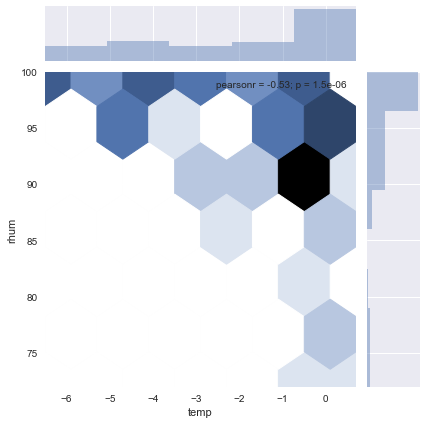

In [157]:
sns.jointplot(x='temp',y='rhum', data=dtdaysnowing, kind='hex')

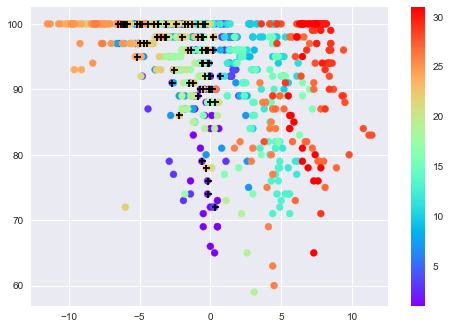

In [158]:
plt.scatter(x = 'temp',y = 'rhum', data = dtsetWinterComp, c='day', cmap ="rainbow", )
plt.colorbar();
plt.scatter(x = 'temp',y = 'rhum', data = dtdaysnowing, c='black' , marker='+');


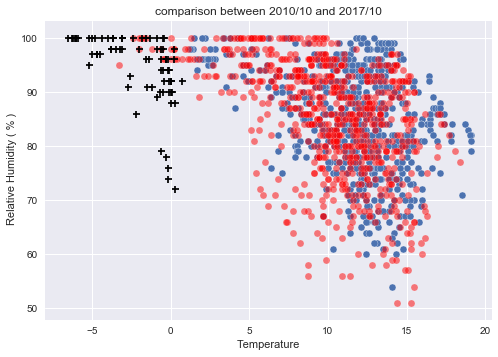

In [231]:
plt.scatter(x = 'temp',y = 'rhum', data = dtsetnow, edgecolors='White')
plt.scatter(x = 'temp',y = 'rhum', data = dtsetbefore, alpha=0.5, c='red', edgecolors='White' )
plt.scatter(x = 'temp',y = 'rhum', data = dtdaysnowing, c='black' , marker='+', edgecolors='White')
plt.title("comparison between 2010/10 and 2017/10")
plt.xlabel("Temperature")
plt.ylabel(" Relative Humidity ( % )");

##### Comparison between winter of 2010.10 and 2017.10 in order to understand it and to see if there's any similarity aiming predict any probability of snowing. Unfortunately the recently datas aren't available yet.
###### Red - 2010.10; Blue - 2017.10; (+) snowing days in 2010.12

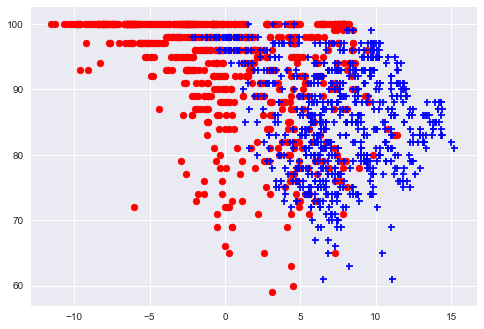

In [214]:
plt.scatter(x = 'temp',y = 'rhum', data = dtsetWinterComp, c='red')
plt.scatter(x = 'temp',y = 'rhum', data = dtset2016, c='blue' , marker='+');

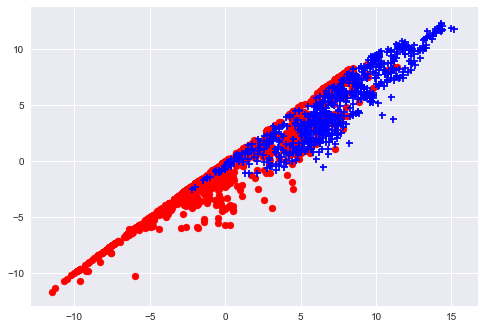

In [216]:
plt.scatter(x = 'temp',y = 'dewpt', data = dtsetWinterComp, c='red')
plt.scatter(x = 'temp',y = 'dewpt', data = dtset2016, c='blue' , marker='+');

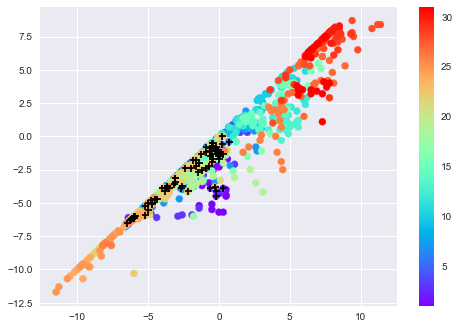

In [217]:
plt.scatter(x = 'temp',y = 'dewpt', data = dtsetWinterComp, c='day', cmap ="rainbow", )
plt.colorbar();
plt.scatter(x = 'temp',y = 'dewpt', data = dtdaysnowing, c='black' , marker='+');

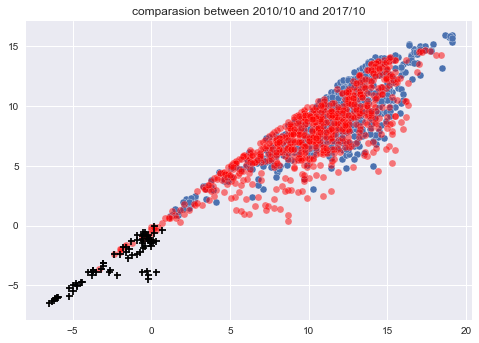

In [222]:
plt.scatter(x = 'temp',y = 'dewpt', data = dtsetnow, edgecolors='White')
plt.scatter(x = 'temp',y = 'dewpt', data = dtsetbefore, alpha=0.5, c='red', edgecolors='White' )
plt.scatter(x = 'temp',y = 'dewpt', data = dtdaysnowing, c='black' , marker='+', edgecolors='White')
plt.title("comparasion between 2010/10 and 2017/10");

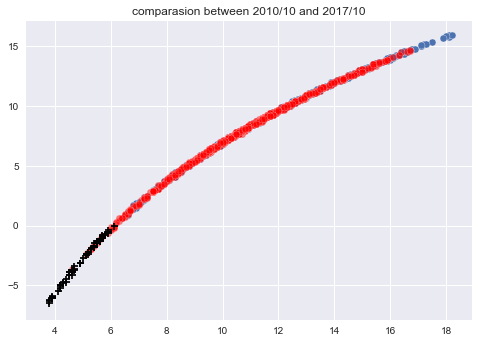

In [223]:
plt.scatter(x = 'vappr',y = 'dewpt', data = dtsetnow, edgecolors='White')
plt.scatter(x = 'vappr',y = 'dewpt', data = dtsetbefore, alpha=0.5, c='red', edgecolors='White' )
plt.scatter(x = 'vappr',y = 'dewpt', data = dtdaysnowing, c='black' , marker='+', edgecolors='White')
plt.title("comparasion between 2010/10 and 2017/10");

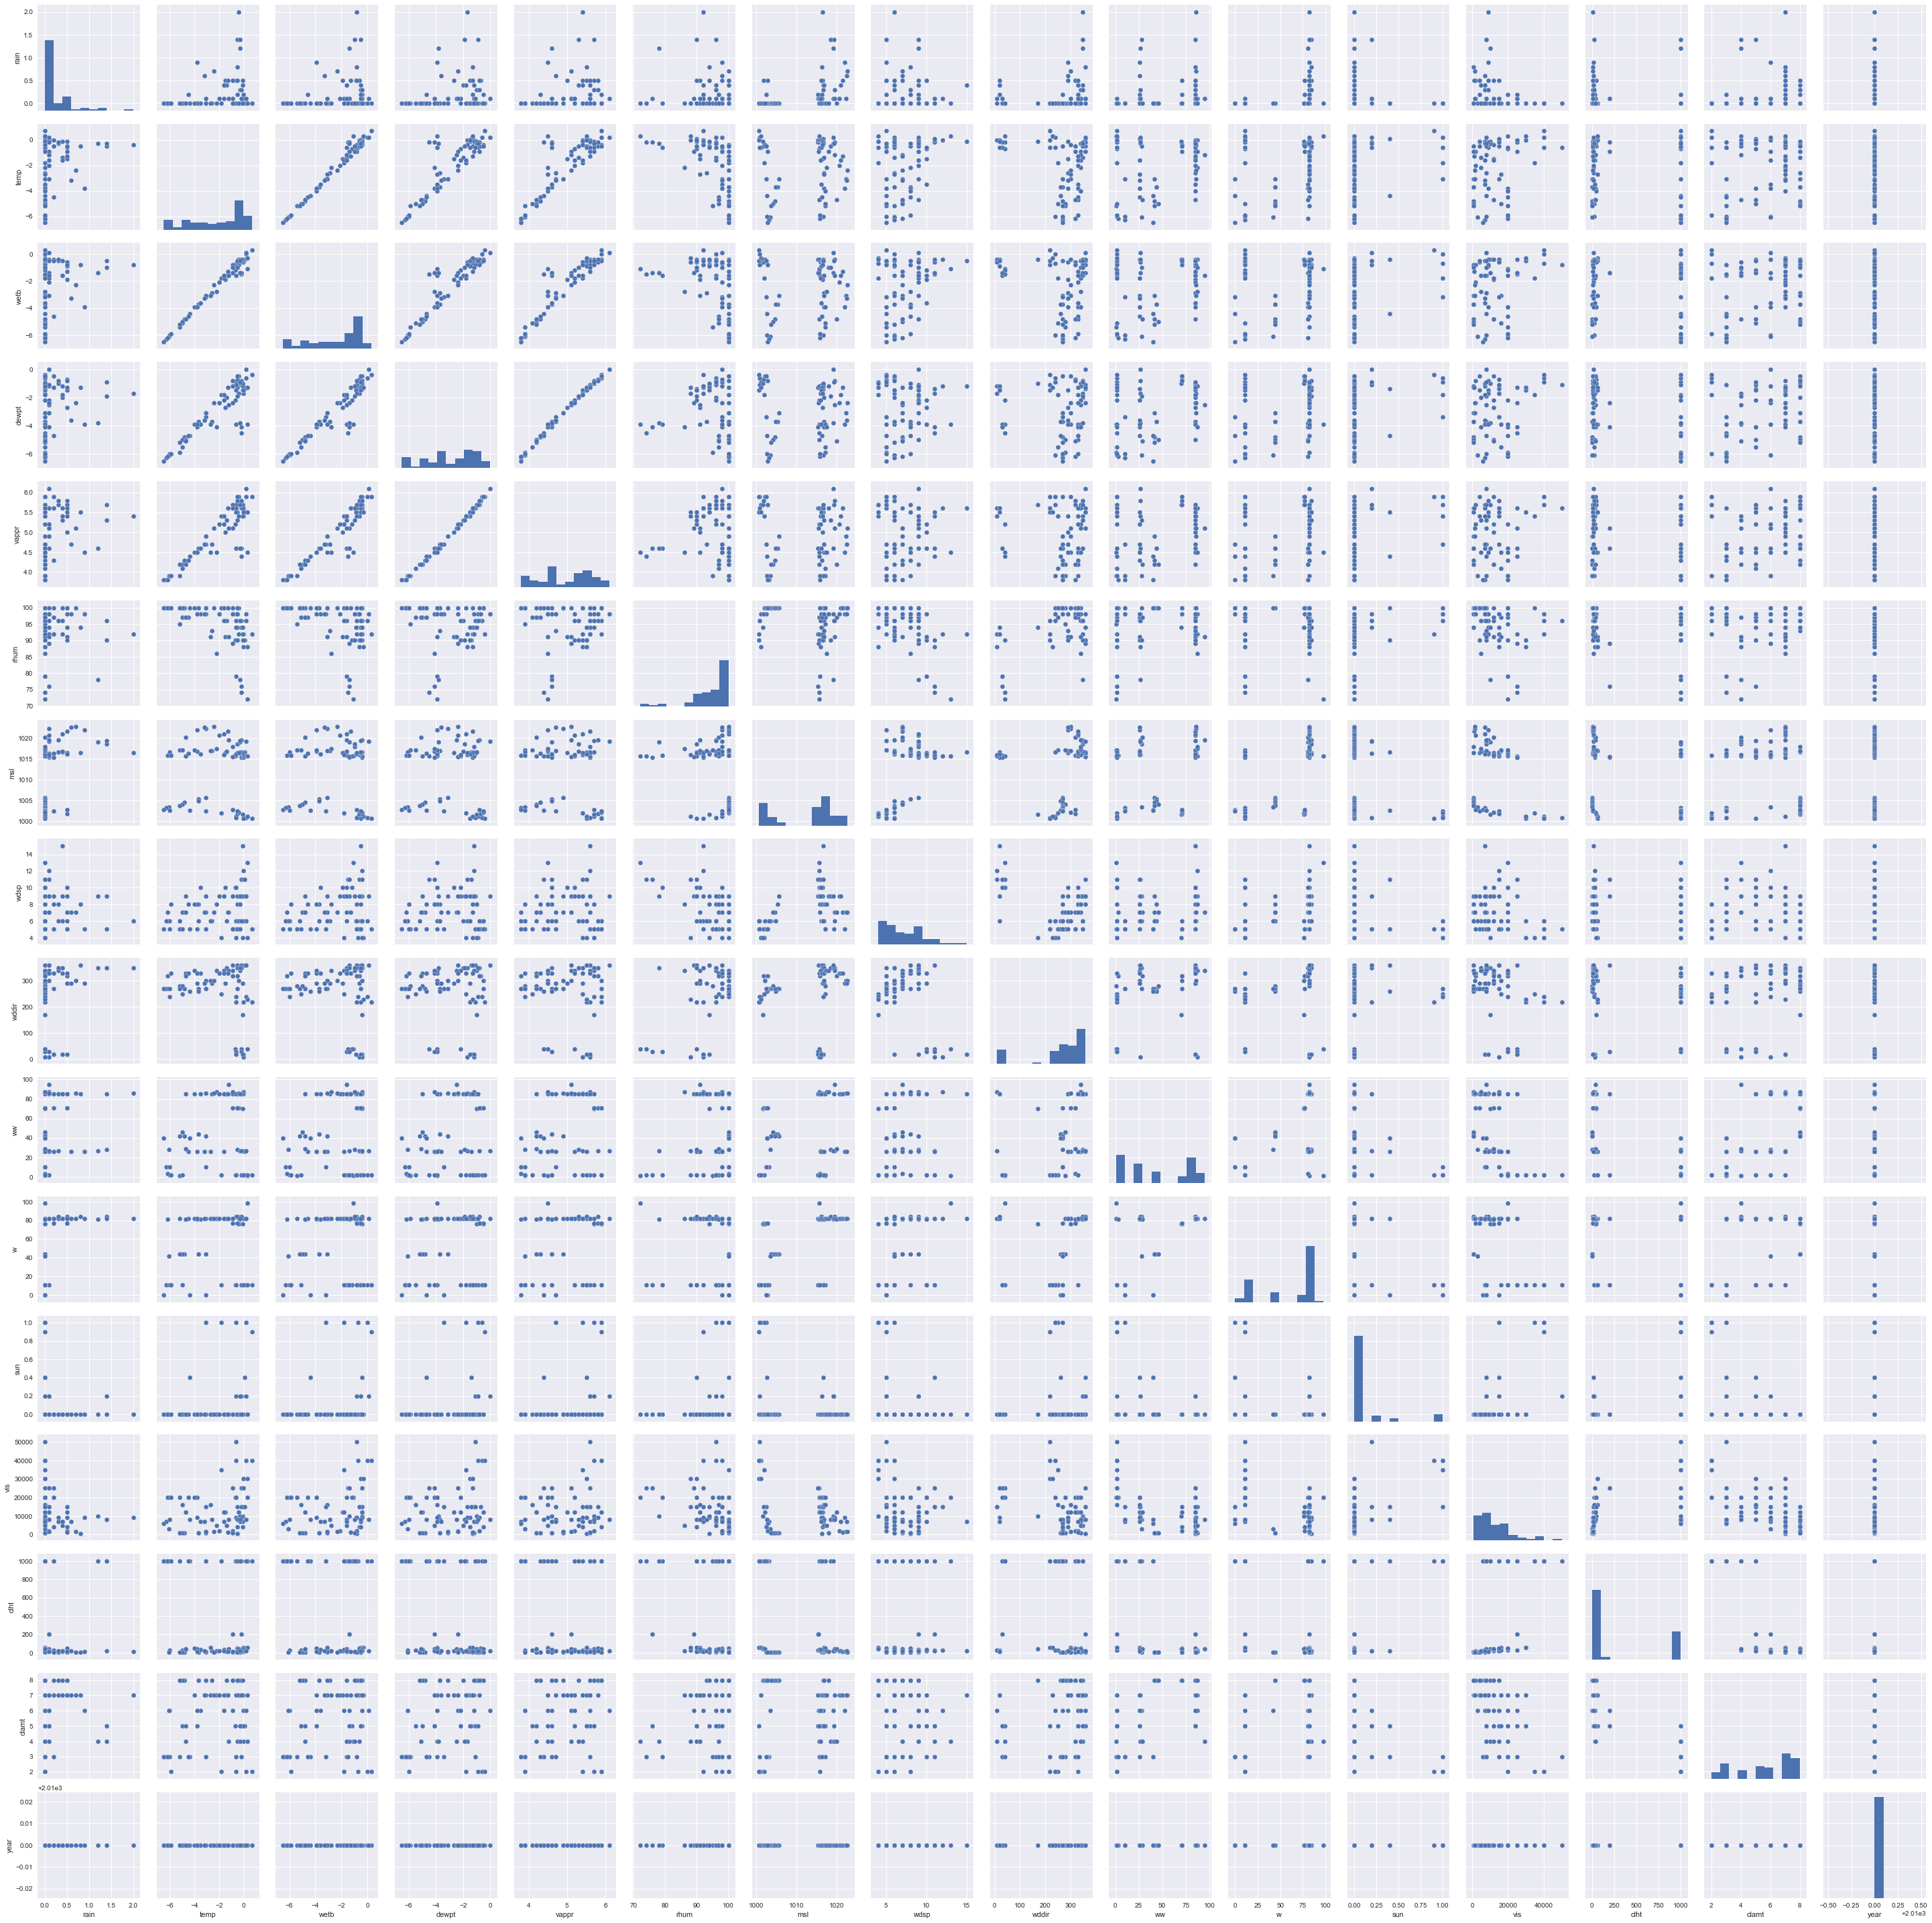

In [224]:
sns.pairplot(dtdaysnowing)

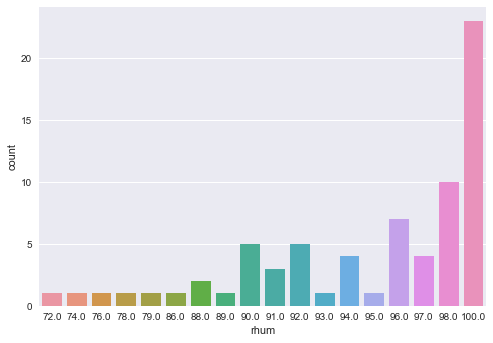

In [225]:
sns.countplot('rhum', data=dtdaysnowing)

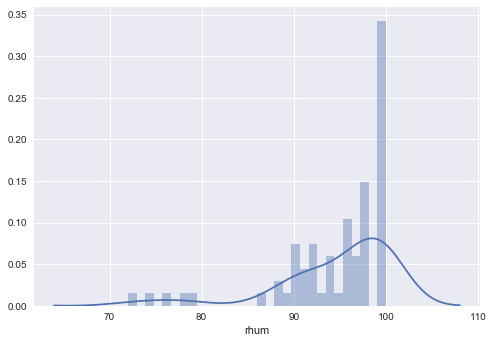

In [228]:
sns.distplot(dtdaysnowing['rhum'], bins=30)

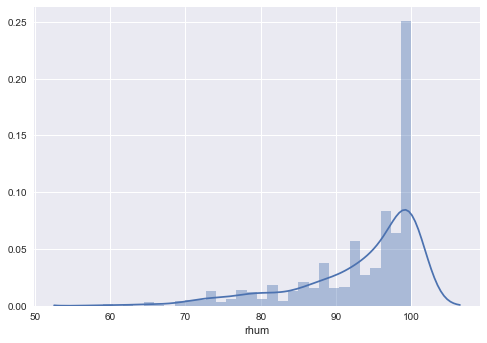

In [229]:
sns.distplot(dtsetWinterComp['rhum'], bins=30)

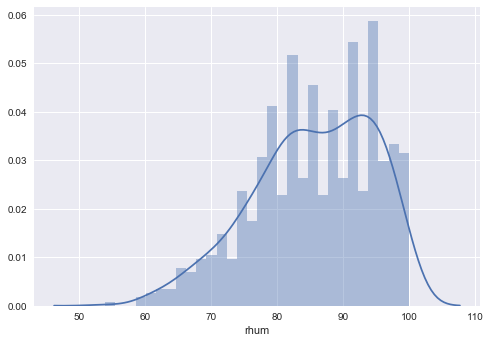

In [230]:
sns.distplot(dtsetnow['rhum'], bins=30)